## Problem ##

### Predict  candidate's salary , during hiring process  using sample hiring data ###

In [84]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Seaborn visualization library
import seaborn as sns
from IPython.display import Markdown


In [85]:
dataset=pd.read_csv("cand_hiring.csv")

In [86]:
dataset.shape

(49, 4)

In [87]:
dataset

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,6.0,6,50000
4,seven,9.0,6,75000
5,three,7.0,8,58000
6,ten,NaN,7,72000
7,eleven,7.0,8,89000
8,twelve,10.0,9,100000
9,three,6.0,7,55000


## Data Cleaning ##

In [88]:
dataset.isnull().sum()

experience         2
test_score         7
interview_score    0
salary             0
dtype: int64

In [89]:
dataset['experience'].fillna(0, 
                             inplace=True)

In [90]:
dataset['test_score'].fillna(dataset['test_score'].mean(),
                             inplace=True)

In [91]:
dataset

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,6.000000,6,50000
4,seven,9.000000,6,75000
5,three,7.000000,8,58000
6,ten,6.309524,7,72000
7,eleven,7.000000,8,89000
8,twelve,10.000000,9,100000
9,three,6.000000,7,55000


## Data Transformation ##

In [92]:
dataset['experience'].replace(to_replace=['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve'],
                         value=['0','1','2','3','4','5','6','7','8','9','10','11','12'],
                         inplace=True)

In [93]:
dataset.isnull().sum()

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64

In [94]:
dataset['test_score']=dataset['test_score'].astype(int)
dataset['interview_score']=dataset['interview_score'].astype(int)

In [95]:
dataset['salary']=round(dataset['salary']/10000,2)

In [96]:
dataset

,experience,test_score,interview_score,salary
0,0,8,9,5.0
1,0,8,6,4.5
2,5,6,7,6.0
3,2,6,6,5.0
4,7,9,6,7.5
5,3,7,8,5.8
6,10,6,7,7.2
7,11,7,8,8.9
8,12,10,9,10.0
9,3,6,7,5.5


## Simple Linear regression ##

In [97]:
X = dataset.iloc[:, :1]
Y = dataset['salary']

In [98]:
X.shape

(49, 1)

In [99]:
X.head()

,experience
0,0
1,0
2,5
3,2
4,7


In [100]:
Y.head()

0    5.0
1    4.5
2    6.0
3    5.0
4    7.5
Name: salary, dtype: float64

## Splitting Training and Test Set

In [101]:
from sklearn.model_selection import train_test_split

#Split the dataset into 50% train and 50% test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=7)


## Model Build ##

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lregressor=LinearRegression()

In [104]:
lregressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_predict=lregressor.predict(X_test)

In [106]:
y_predict=y_predict.round()

In [107]:
linter=round(lregressor.intercept_)
print("intercept",linter)

intercept 4.0


In [108]:
lcoef=lregressor.coef_
print("coefficents",lcoef)

coefficents [0.488875]


## Plotting the predictions ##

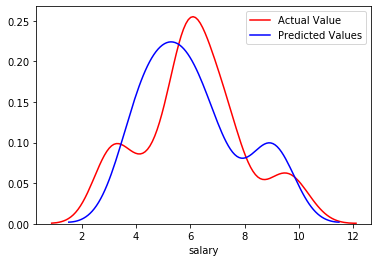

In [109]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Predicted Values" , ax=ax1);

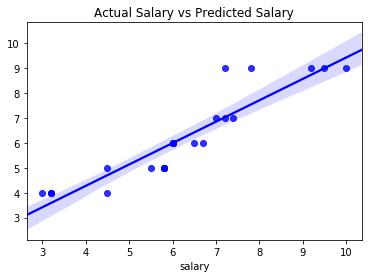

In [110]:
sns.regplot(y_test,y_predict,color='b')
plt.title("Actual Salary vs Predicted Salary");

## Plotting the residulas

In [111]:
residuals=y_test-y_predict

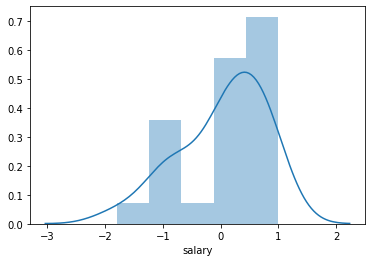

In [112]:
sns.distplot(residuals)

## Residual vs Fitted plot

Text(0, 0.5, 'Residual')

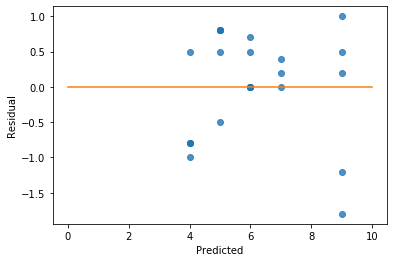

In [113]:
sns.regplot(x=y_predict,y=residuals,fit_reg=False)
plt.plot([0,10],[0,0])
plt.xlabel("Predicted")
plt.ylabel("Residual")

## Model Evaluation##

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

## R square ##

R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [115]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))

R2 score : 0.85


## Mean squared error (MSE) ##

In [116]:
p=(y_predict-y_test)**2
np.mean(p)

0.5256000000000001

MSE is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3.. and the predicted ones pred(y1), pred(y2), pred(y3).. We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

In [117]:
print("Mean squared error: %.2f" % mean_squared_error(y_predict,y_test))

Mean squared error: 0.53


In [118]:
lst=list(zip(y_test,y_predict))

In [119]:
pd.DataFrame(lst,columns=['Actual','Predicted'])

,Actual,Predicted
0,6.0,6.0
1,6.5,6.0
2,7.0,7.0
3,9.2,9.0
4,5.8,5.0
5,3.2,4.0
6,4.5,4.0
7,5.8,5.0
8,7.2,7.0
9,5.8,5.0


## Model Function ##

In [120]:
Markdown("y = f(x) =  {ln} + {cf} * {X1}".format(ln=linter, cf=lcoef,X1=X.columns[0]))

y = f(x) =  4.0 + [0.488875] * experience

## Multi Linear regression

In [121]:
X=dataset.iloc[:,:2]
Y=dataset.iloc[:,-1]

In [122]:
X.head()

,experience,test_score
0,0,8
1,0,8
2,5,6
3,2,6
4,7,9


In [123]:
Y.head()

0    5.0
1    4.5
2    6.0
3    5.0
4    7.5
Name: salary, dtype: float64

## Splitting Train and Test data ##

In [124]:


from sklearn.model_selection import train_test_split

#Split the dataset into 50% train and 50% test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=7)

## Model Build ##

In [125]:
mregressor=LinearRegression()

In [126]:
mregressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
y_predict=mregressor.predict(X_test)

In [128]:
y_predict=y_predict.round()

In [129]:
minter=round(mregressor.intercept_,3)
print("intercept",minter)

intercept 2.642


In [130]:
mcoef=mregressor.coef_.round(3)
print("coefficents",mcoef)

coefficents [0.427 0.24 ]


## Model Function ##

Markdown("y = f(x) =  {ln} + {cf1} * {X1} + {cf2} * {X2} + {cf3} * {X3}"
         .format(ln=minter, 
                 cf1=mcoef[0],X1=X.columns[0] ,
                 cf2=mcoef[1],X2=X.columns[1] ,
                 cf3=mcoef[2],X3=X.columns[2]))

## Plotting the predictions ##

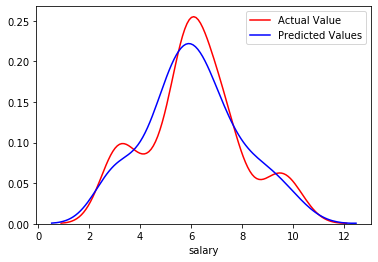

In [131]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Predicted Values" , ax=ax1);

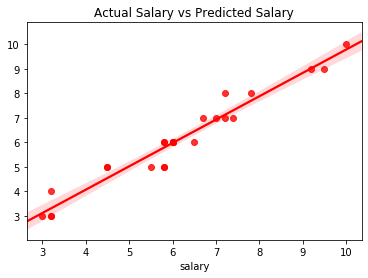

In [132]:
sns.regplot(y_test,y_predict,color='r')
plt.title("Actual Salary vs Predicted Salary");


## Plotting the residuals

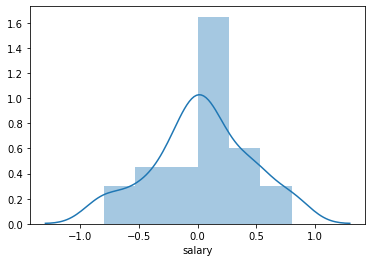

In [133]:
residuals=y_test-y_predict
sns.distplot(residuals)

## Residual vs Fitted plot

Text(0, 0.5, 'Residual')

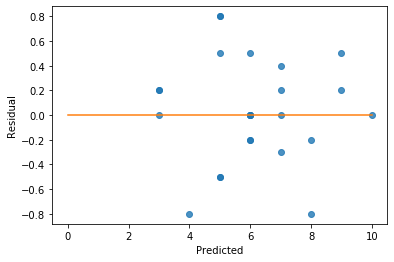

In [134]:
sns.regplot(x=y_predict,y=residuals,fit_reg=False)
plt.plot([0,10],[0,0])
plt.xlabel("Predicted")
plt.ylabel("Residual")

# Model Evaluation #

## R square ##

In [135]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))

R2 score : 0.95


## Mean squared error (MSE) ##

In [136]:

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_predict))

Mean squared error: 0.17


In [137]:
lst=list(zip(y_test,y_predict.astype(int)))

In [138]:
pd.DataFrame(lst,columns=['Actual','Predicted'])

,Actual,Predicted
0,6.0,6
1,6.5,6
2,7.0,7
3,9.2,9
4,5.8,5
5,3.2,3
6,4.5,5
7,5.8,6
8,7.2,7
9,5.8,6


In [139]:
# Apply multiple Linear Regression
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

df2=pd.DataFrame(X,columns=['experience','test_score'])
df2['salary']=pd.Series(Y)

results_formula = mregressor.fit(X_train,y_train)


In [140]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(df2.experience.astype(int).min(), df2.experience.astype(int).max(), 5),
                             np.linspace(df2.test_score.astype(int).min(), df2.test_score.astype(int).max(), 5))
onlyX = pd.DataFrame({'experience': x_surf.ravel(), 'test_score': y_surf.ravel()})

fittedY=results_formula.predict(X_test)

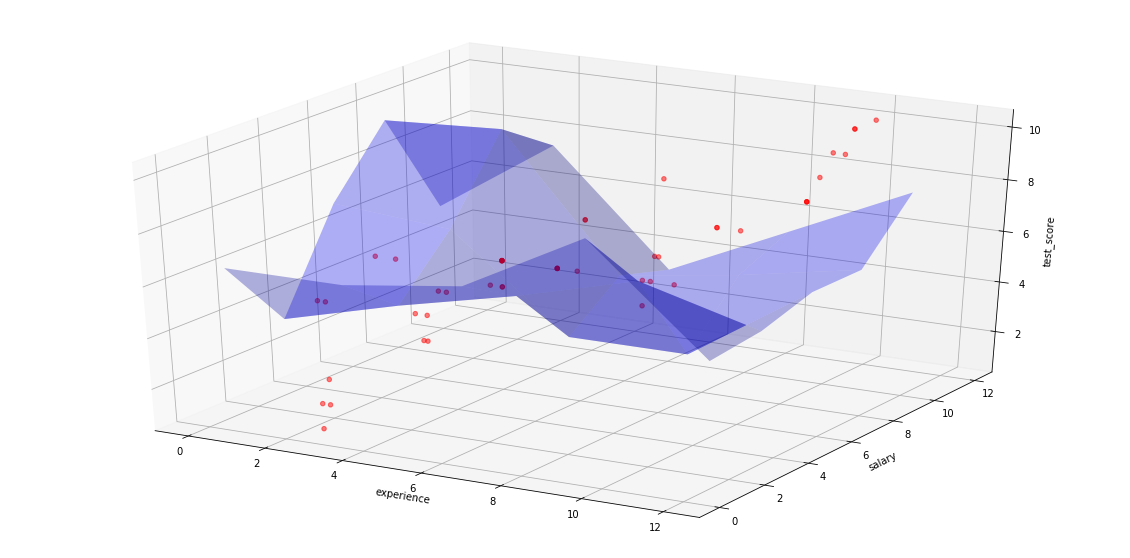

In [141]:
## convert the predicted result in an array
z_surf=np.array(fittedY)
z_surf=z_surf.reshape(x_surf.shape)

# Visualize the Data for Multiple Linear Regression

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('experience')
ax.set_ylabel('salary')
ax.set_zlabel('test_score')
ax.scatter(df2['salary'],df2['experience'],df2['test_score'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,z_surf, color='b', alpha=0.3)

plt.show()

## Square transformation 

In [142]:
dataset['test_score_sq']=dataset['test_score']**2

In [143]:
dataset.drop(['test_score'],axis=1,inplace=True)

In [144]:
dataset=dataset[['experience','test_score_sq','interview_score','salary']]

In [145]:
dataset

,experience,test_score_sq,interview_score,salary
0,0,64,9,5.0
1,0,64,6,4.5
2,5,36,7,6.0
3,2,36,6,5.0
4,7,81,6,7.5
5,3,49,8,5.8
6,10,36,7,7.2
7,11,49,8,8.9
8,12,100,9,10.0
9,3,36,7,5.5


ValueError: Input passed into argument "'y1'"is not 1-dimensional.

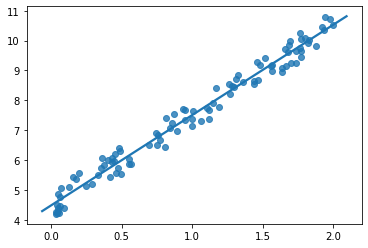

In [146]:
X=2*np.random.rand(100,1)
Y=4+3*X+np.random.rand(100,1)
sns.regplot(X,Y)